<a href="https://colab.research.google.com/github/ce20480/PythonPractice/blob/main/IntroToDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# this is to make sure the initial random point is the same
from numpy.random import seed
from tensorflow.random import set_seed
seed(0)
set_seed(0)

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
iris = load_iris()
x = iris['data']
y = iris['target'] 

In [8]:
print('example x data point', x[120])
print('example x data point', x[120])

print('num classes: ', len(np.unique(y)))

num_classes = len(np.unique(y))
num_features = x.shape[1]
print(x.shape) # gives a tuple containing the number of rows and colomns so we want the features which is the number of colomns 

example x data point [6.9 3.2 5.7 2.3]
example x data point [6.9 3.2 5.7 2.3]
num classes:  3
(150, 4)


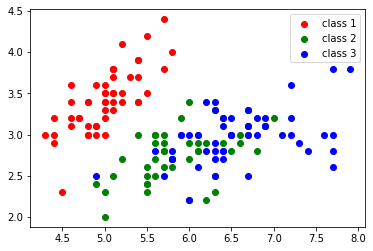

In [12]:
plt.scatter(x[:50,0], x[:50,1], c='r', label='class 1')
plt.scatter(x[50:100,0], x[50:100,1], c='g', label='class 2')
plt.scatter(x[100:150,0], x[100:150,1], c='b', label='class 3')
plt.legend()

In [14]:
print('example y class label: ', y[120])
y = to_categorical(y)
print('example y class label: ', y[120])

example y class label:  2
example y class label:  [0. 0. 1.]


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
scaler = StandardScaler()# remove mean and have unit variance
x_train = scaler.fit_transform(x_train) # do after split so we only learn on train set
x_test = scaler.transform(x_test) # hope that they have same distribution

In [29]:
# Sequential network means during forward pass it passes through layers 1 by 1
model = Sequential()

model.add(Dense(12, input_dim=num_features, activation='relu')) # relu is simple return input if postive 0 if not
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))# can add even more layers however this can lead to overfitting and this layer returns probabilities

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01),metrics=['accuracy']) # build and define loss

history = model.fit(x_train, y_train, epochs=500)#epoch is number times going through the dataset

Epoch 1/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1977 - accuracy: 0.3238
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 1.1771 - accuracy: 0.3238
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 1.1605 - accuracy: 0.3333
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 1.1436 - accuracy: 0.3429
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1296 - accuracy: 0.5238
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1157 - accuracy: 0.6095
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1021 - accuracy: 0.6095
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 1.0908 - accuracy: 0.6381
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 1.0806 - accuracy: 0.6571
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 1.0706 - accuracy: 0.6571
Epoch 11/500
4/4 [===========

In [30]:
loss, accuracy = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1046 - accuracy: 1.0000


Text(0, 0.5, 'loss')

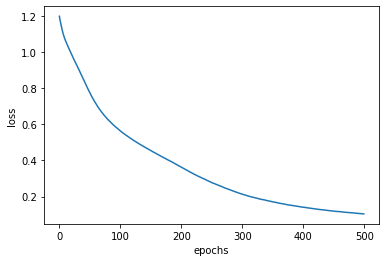

In [31]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

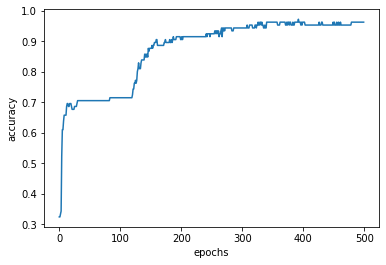

In [32]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')